In [1]:
#from scSHARP.sc_sharp import *
from scSHARP.sc_sharp import scSHARP

In [2]:
data_path = "simulations/splat_0.7/query_counts.csv.gz"
#tool_preds = "simulations/splat_0.7/preds.csv"
tool_preds = "/users/daniel/desktop/preds_test.csv"
#tool_preds = None
tool_list = ["scina", "scsorter", "sctype", "scpred", "singler"]
marker_path = "simulations/splat_0.7/markers.txt"
neighbors=2

config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_list, marker_path, tool_preds, neighbors, config)

In [ ]:
out_path = "/users/daniel/desktop/preds_test.csv"
ref_path = "simulations/splat_0.7/ref_counts.csv.gz"
ref_label_path = "simulations/splat_0.7/ref_labels.csv"
sharp.run_tools(out_path, ref_path, ref_label_path)

(             scina  scsorter    sctype   singler    scpred
 scina     1.000000  0.754315  0.693673  0.822295  0.433323
 scsorter  0.754315  1.000000  0.711482  0.798433  0.426196
 sctype    0.693673  0.711482  1.000000  0.804131  0.442009
 singler   0.822295  0.798433  0.804131  1.000000  0.483785
 scpred    0.433323  0.426196  0.442009  0.483785  1.000000,
 <AxesSubplot:>)

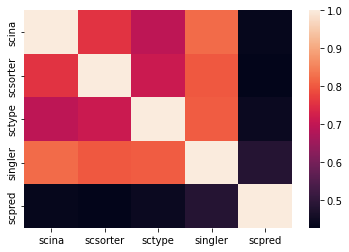

In [3]:
sharp.component_correlation()

In [3]:
preds, train_nodes, test_nodes, keep_cells, conf_scores = sharp.run_prediction(training_epochs=30, thresh=0.51, batch_size=20, seed=8)
print(preds[0:10])
print(conf_scores[0:10])

Loss in epoch 0 = 57.944233
Loss in epoch 10 = 0.054911
Loss in epoch 20 = 0.014803
tensor([0, 0, 2, 0, 3, 3, 1, 2, 1, 2])
tensor([1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SliceBackward0>)


In [ ]:
sharp.save_model("/Users/daniel/Desktop/example_model")

In [ ]:
sharp.load_model("/Users/daniel/Desktop/example_model")

/Users/daniel/miniconda3/envs/thesis/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/daniel/miniconda3/envs/thesis/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


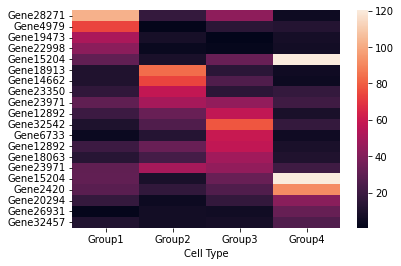

<AxesSubplot:xlabel='Cell Type'>

In [5]:
int_df = sharp.run_interpretation()
sharp.heat_map(n=5)

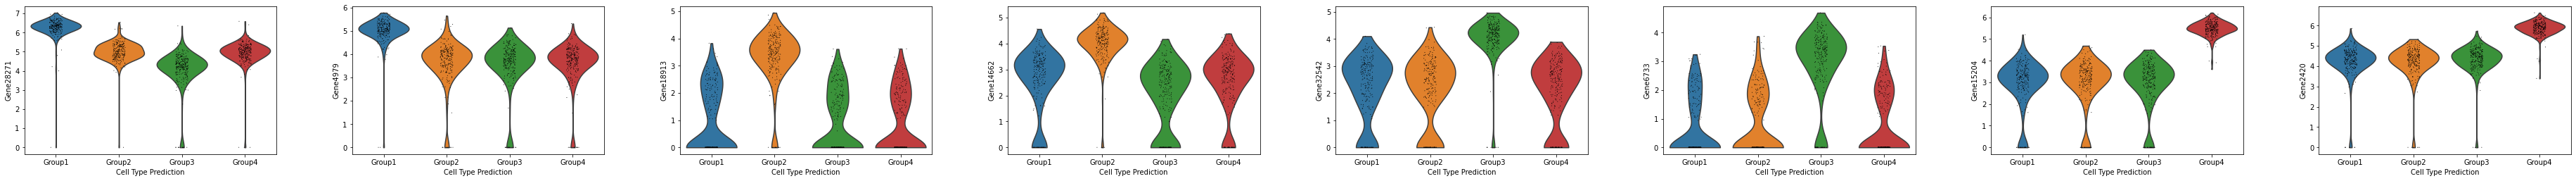

In [6]:
sharp.expression_plots(n=2)